In [1]:
from utils import data_path
import jax.numpy as np
from _region.shapes import ConvexPolygon, Circle
from _region.region import Domain, Subdomain

In [2]:
total_vertices = np.asarray(
    [
        [-1, 0],
        [-0.2, 0],
        [0.2, 0],
        [1, 0],
        [1, 1],
        [0.7, 1],
        [0.3, 1],
        [-1, 1],
    ]
)

region_idx = np.asarray([[1, 2, 5, 6], [2, 3, 4, 5], [0, 1, 6, 7]])
boundary_idx = [[0], [0], [0]]

regions_verts = total_vertices[region_idx]
print(regions_verts[0])

[[-0.2  0. ]
 [ 0.2  0. ]
 [ 0.7  1. ]
 [ 0.3  1. ]]


Defining the regions

In [3]:
# First subdomain
subdomain0 = Subdomain(
    [ConvexPolygon(regions_verts[0], boundary_idx[0])],
)
subdomain1 = Subdomain(
    [ConvexPolygon(regions_verts[1], boundary_idx[1])],
)
subdomain2 = Subdomain(
    [ConvexPolygon(regions_verts[2], boundary_idx[2])],
)
domain = Domain([subdomain0, subdomain1, subdomain2])

In [4]:
domain.create_interior(2000, [[-1, 0], [1, 1]])
domain.create_boundary(200)
domain.create_interface(100, (0, 1), (total_vertices[2], total_vertices[5]))
domain.create_interface(100, (0, 2), (total_vertices[1], total_vertices[6]))

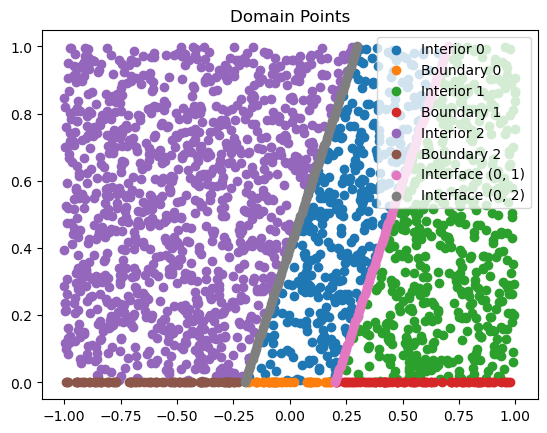

In [5]:
domain.plot()

In [6]:
domain.write_to_file(data_path / "test_advection.json")

In [7]:
from xpinn import XPINN

In [8]:
xpinn = XPINN(data_path / "test_advection.json", np.tanh)